In [1]:
import main
import plot_inequality as plot_ineq
import time
import importlib
importlib.reload(plot_ineq)
#run stuff here
start_time = time.perf_counter()
print("Running main")

# ***** may want to change how trans is generated its redundant in do file.
of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
trans_path = main_path + "input/k2_moms/MH_trans_by_MH_clust_age.csv"
myPars, myShocks, sols, sims = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path)

Running main
*****Running main_io with default out_folder_name*****
Using health transition matrix from: C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/input/k2_moms/MH_trans_by_MH_clust_age.csv
Solver ran in 10.078935300000012 seconds
Calibrating with alpha_lab_targ = 0.31843521862745094, w0_mean_targ = 9.4544821, w0_sd_targ = 3.198086, w1_targ = 0.33709601365812425, w2_targ = 0.2953475031595776, wH_targ = 0.040755425
***** Calibration iteration 0 *****
***** Calibration iteration 1 *****
***** Calibration iteration 2 *****
***** Calibration iteration 3 *****
***** Calibration iteration 4 *****
***** Calibration iteration 5 *****
***** Calibration iteration 6 *****
***** Calibration iteration 7 *****
***** Calibration iteration 8 *****
***** Calibration iteration 9 *****
***** Calibration iteration 10 *****
***** Calibration iteration 11 *****
***** Calibration iteration 12 *****
***** Calibration iteration 13 *****
Calibration converge

mean sim:  [  232.72809582   260.31614406   284.59555772   315.7304897
   337.98084897   367.50055367   390.13163296   412.12030675
   433.86313743   462.50940353   480.41282418   501.86491692
   518.74278747   537.13451798   558.44381373   575.82236186
   591.62599629   603.25326471   619.39205863   630.54730672
   639.81596629   644.76011051   653.47480406   659.72592906
   662.2185509    665.2476018    662.74068675   662.28773858
   663.11097676   656.42080747   648.26915797   642.53532746
   633.75462488   626.01235136   614.01593508   598.51540114
   590.50447779   577.34965502   558.84516596   538.5017719
   528.78595096   503.28220523   480.42075043   458.26277072
   437.74350817   408.55927982   385.27721401   360.96745501
   333.35538048   303.20608343   277.40577479 -9999.        ]
var sim:  [15025.03384158 18074.15496487 20969.13609256 25584.45482051
 28911.99264091 33315.2144567  36821.30541341 40231.17988503
 44434.37517058 49869.54495912 53140.89965159 57649.55897164
 613

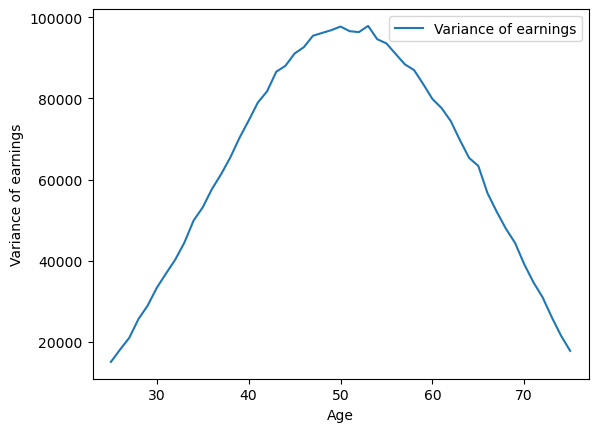

mean log sim:  [5.29308214 5.4104701  5.50454967 5.60918583 5.67822167 5.76454563
 5.82702839 5.88381962 5.93586111 6.0011572  6.0400097  6.08420628
 6.11802123 6.15356219 6.19211593 6.22361615 6.25012461 6.27026627
 6.29593882 6.31592548 6.32985061 6.33758085 6.34987203 6.36152386
 6.36503636 6.36995599 6.36639353 6.36591331 6.36569244 6.35692649
 6.34272945 6.33539561 6.32141718 6.30834499 6.28949107 6.26300024
 6.24977979 6.22694967 6.19431974 6.15685308 6.1375925  6.0894313
 6.0425876  5.99383295 5.94616692 5.87573613 5.81766297 5.75135189
 5.67362995 5.57838435 5.49009497 0.        ]
var log sim:  [0.34490365 0.33313978 0.32088139 0.31929729 0.3180102  0.31278308
 0.30672333 0.302932   0.30140559 0.29847037 0.29703711 0.29618837
 0.29439473 0.29261836 0.29471264 0.29203533 0.2930599  0.29154996
 0.29322308 0.28876433 0.29037509 0.29000029 0.29331271 0.28789434
 0.28876088 0.2875763  0.28732563 0.28695071 0.28996964 0.28718859
 0.29101862 0.28725407 0.2882602  0.28953629 0.2882343 

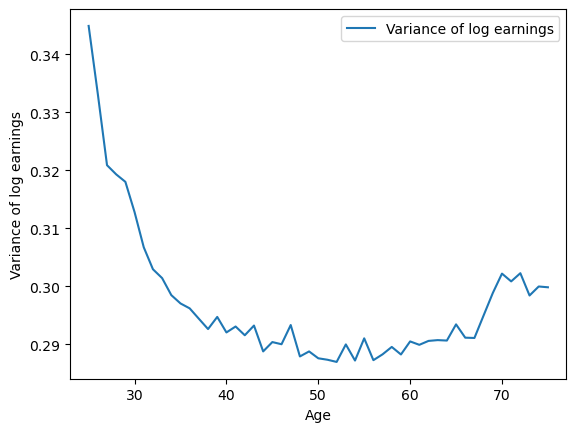

In [2]:
import numpy as np
import my_toolbox as tb
# my_age_grid = myPars.age_grid[:31] # only want to plot up to age 55
my_age_grid = myPars.age_grid
out_path = main_path + "output/var_earn_test_fig.pdf"
input_path = main_path + "input/k2_moms/"
plot_save_path = main_path + "validation/" 

# fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars,sims["lab_earnings"], 
#                                                                     y_axis_label_var, out_path, quietly = False)
y_axis_label_var = "Variance of earnings"
sim = sims["lab_earnings"]
# sim = sim/100
# print("sim shape: ", sim.shape)
mean_sim_by_age = np.mean(sim, axis = tuple(range(0, sim.ndim - 1)))  
# print("mean sim shape: ", mean_sim_by_age.shape)
print("mean sim: ", mean_sim_by_age)
var_sim_by_age = np.var(sim, axis = tuple(range(0, sim.ndim - 1)))
# print("var sim shape: ", var_sim_by_age.shape)
print("var sim: ", var_sim_by_age)
tb.plot_lc_mom_by_age(var_sim_by_age, my_age_grid,  y_axis_label_var, quietly = False)

# make it logs
y_axis_label_var = "Variance of log earnings"
log_sim = np.log(sim, where = sim > 0)
# log_sim = np.log(sim)
# print("log sim shape: ", log_sim.shape)
mean_log_sim_by_age = np.mean(log_sim, axis = tuple(range(0, log_sim.ndim - 1)))
# print("mean log sim shape: ", mean_log_sim_by_age.shape)
print("mean log sim: ", mean_log_sim_by_age)
var_log_sim_by_age = np.var(log_sim, axis = tuple(range(0, log_sim.ndim - 1)))
# print("var log sim shape: ", var_log_sim_by_age.shape)
print("var log sim: ", var_log_sim_by_age)
fig_var_log_mod, ax_var_log_mod = tb.plot_lc_mom_by_age(var_log_sim_by_age, my_age_grid,  y_axis_label_var, quietly = False)

In [3]:
min_sim = np.min(sim, axis = tuple(range(0, sim.ndim - 1)))
print("min sim: ", min_sim)
mean_sim = np.mean(sim, axis = tuple(range(0, sim.ndim - 1)))
print("mean sim: ", mean_sim)
max_sim = np.max(sim, axis = tuple(range(0, sim.ndim - 1)))
print("max sim: ", max_sim)

min sim:  [   50.42546876    60.61966095    70.63614405    80.53903913
    89.9686955     99.32158371   108.32674948   117.11111953
   125.37976025   133.61158074   141.35785178   148.65593527
   155.54102819   161.97398494   168.05695623   173.67586525
   178.79024175   183.31051566   187.46425972   191.19047145
   195.53312908   196.71743841   198.36001576   199.84364211
   202.56208101   202.19674049   202.12145715   201.03672821
   199.49612727   198.19250946   195.15599361   191.60132236
   188.0103366    183.89614729   181.08256941   172.19380936
   168.88269797   161.64974349   158.09442063   152.25106429
   143.30649909   135.25020304   127.31957364   121.62888493
   110.82085583   100.80999428    90.67846424    82.09465663
    76.44382079    67.77026363    38.7588746  -9999.        ]
mean sim:  [  232.72809582   260.31614406   284.59555772   315.7304897
   337.98084897   367.50055367   390.13163296   412.12030675
   433.86313743   462.50940353   480.41282418   501.86491692
   

In [4]:
min_log_sim = np.min(log_sim, axis = tuple(range(0, log_sim.ndim - 1)))
# print("min log sim: ", min_log_sim)
mean_log_sim = np.mean(log_sim, axis = tuple(range(0, log_sim.ndim - 1)))
# print("mean log sim: ", mean_log_sim)
max_log_sim = np.max(log_sim, axis = tuple(range(0, log_sim.ndim - 1)))
# print("max log sim: ", max_log_sim)

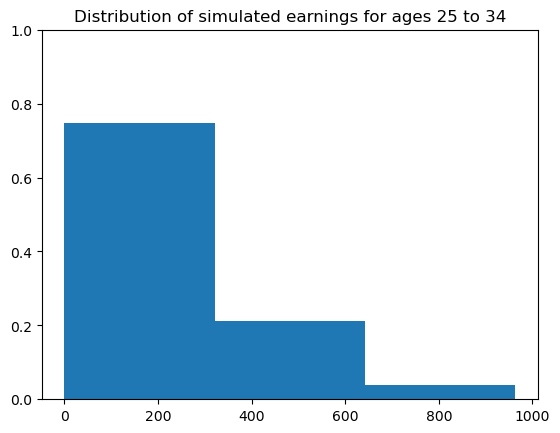

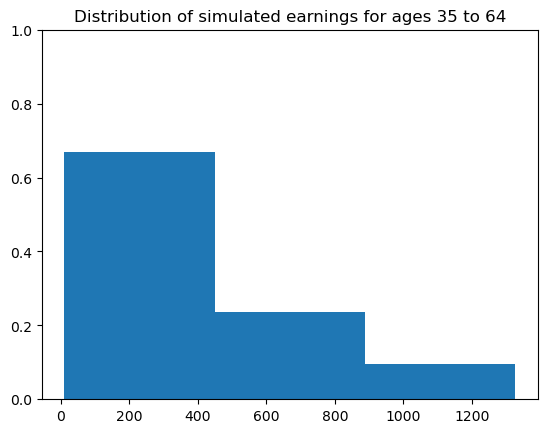

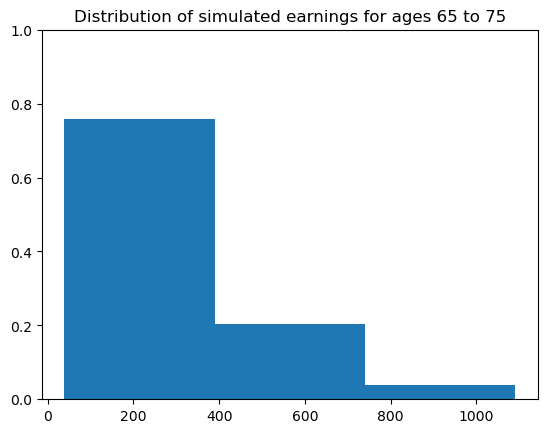

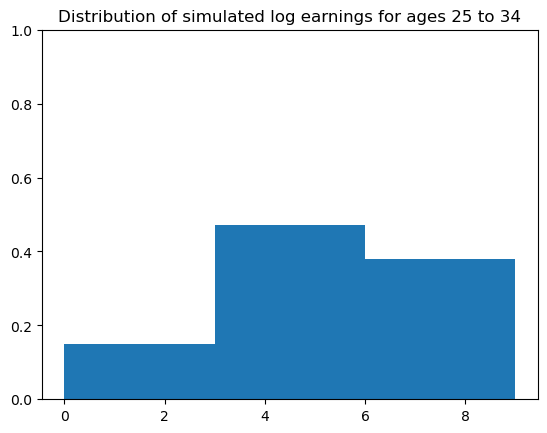

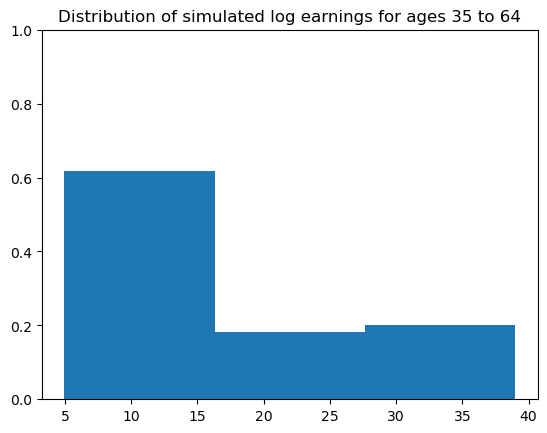

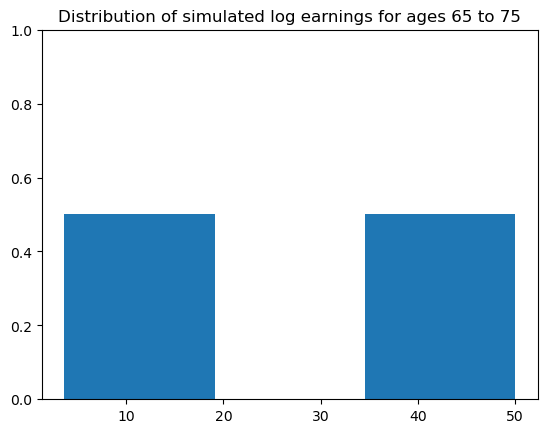

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

end_of_beg = 10
end_of_mid = 40

# flatten the sim array to the last/age dimension and convert to a dataframe
sim_flat = sim.reshape(-1, sim.shape[-1])
sim_df = pd.DataFrame(sim_flat)
# drop the last column
sim_df = sim_df.iloc[:, :-1]
# create new df containing first 15 columns
sim_df_beg = pd.melt(sim_df.iloc[:, :end_of_beg])
sim_df_mid = pd.melt(sim_df.iloc[:, end_of_beg:end_of_mid])
sim_df_end = pd.melt(sim_df.iloc[:, end_of_mid:])
#logs of data frames
log_sim_flat = log_sim.reshape(-1, log_sim.shape[-1])
log_sim_df = pd.DataFrame(log_sim_flat)
log_sim_df = log_sim_df.iloc[:, :-1]
log_sim_df_beg = pd.melt(log_sim_df.iloc[:, :end_of_beg])
log_sim_df_mid = pd.melt(log_sim_df.iloc[:, end_of_beg:end_of_mid])
log_sim_df_end = pd.melt(log_sim_df.iloc[:, end_of_mid:])

def df_single_hist(df: pd.DataFrame, figure_title: str = None) -> None:
    data = df.values.flatten()  # Flatten the DataFrame to a single array
    # Compute the histogram (without density)
    counts, bins, patches = plt.hist(data, bins=3)
    total_count = np.sum(counts)
    proportions = counts / total_count
    # Update the heights of the bars to reflect proportions
    for proportion, patch in zip(proportions, patches):
        patch.set_height(proportion)
    plt.ylim(0, 1)
    if figure_title is not None:
        plt.title(figure_title)
    
    plt.show()

beg_suffix = f" for ages 25 to {25 + end_of_beg-1}"
mid_suffix = f" for ages {25 + end_of_beg} to {25 + end_of_mid-1}"
end_suffix = f" for ages {25 + end_of_mid} to 75"

base_title = "Distribution of simulated earnings"    
df_single_hist(sim_df_beg, base_title + beg_suffix)
df_single_hist(sim_df_mid, base_title + mid_suffix)
df_single_hist(sim_df_end, base_title + end_suffix)

log_base_title = "Distribution of simulated log earnings"
df_single_hist(log_sim_df_beg, log_base_title + beg_suffix)
df_single_hist(log_sim_df_mid, log_base_title + mid_suffix)
df_single_hist(log_sim_df_end, log_base_title + end_suffix)


[0.29577768 0.32912752 0.30050325 0.32463273 0.40643588 0.36700162
 0.43481147 0.39538559 0.43973655 0.47059116 0.41190991 0.45947465
 0.42872056 0.51242596 0.51664013 0.46983862 0.45866686 0.50632793
 0.48849669 0.55382079 0.51662487 0.49278805 0.49086547 0.4819333
 0.46995622 0.43247598 0.52535349 0.47595876 0.43319237 0.49938533
 0.55281079 0.52721786 0.51068133 0.49031496 0.52227342 0.56503129
 0.54195547 0.62610108 0.66677094 0.73860806 0.77256316 1.0368075
 0.97554088 0.84191203 0.96586853 1.115932   0.9639169  0.7425915
 1.202029   1.4638422  1.0871583  1.2272716 ]


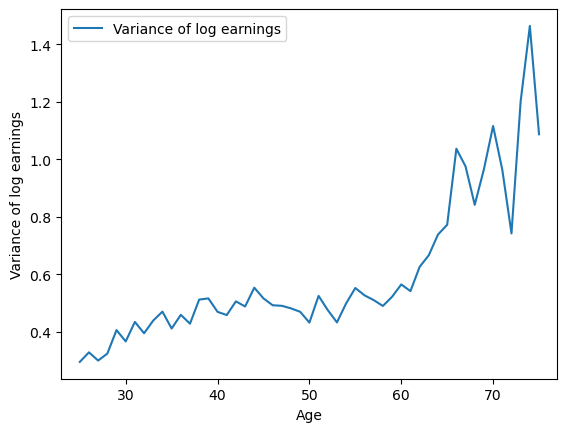

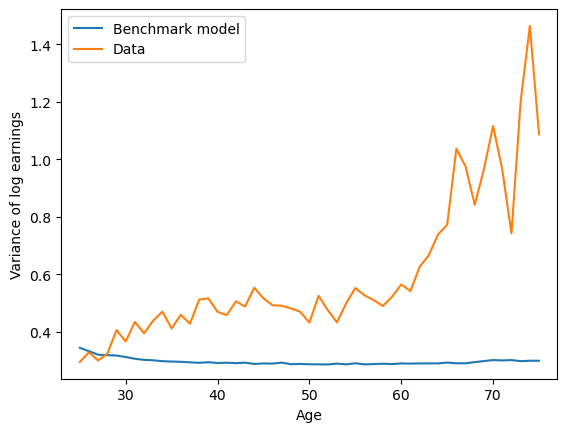

In [6]:
input_path = main_path + "input/k2_moms/"
plot_save_path = main_path + "validation/" + "validating_var_earn" + ".pdf"
# quietly = True
label_lists = [["Benchmark model"], ["Data"]]
line_colors = ["C0", "C1"] # these are the standard matplotlib colors

var_log_earns_data = tb.read_specific_column_from_csv(input_path + "var_earn_moments.csv", 1)
print(var_log_earns_data)

fig_var_log_data, ax_var_log_data = tb.plot_lc_mom_by_age(var_log_earns_data, my_age_grid, plot_save_path, y_axis_label_var, quietly = False)

fig_combined, ax_combined = tb.combine_plots([(fig_var_log_mod, ax_var_log_mod), (fig_var_log_data, ax_var_log_data)], 
                                              label_lists = label_lists, colors = line_colors) 